In [56]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt

# 🧭 Step 1: Understand the Data You’re Working With
Hint: Before doing anything else, load the dataset and try to get a feel of the data.
Ask questions like:

1. What columns are there?

2. What types of values do they hold?

3. Any weird values you notice right away?

4. Are there NaNs?

In [2]:
df=pd.read_csv('dirty_credit_card_fraud_dataset.csv')

In [3]:
df1=df.copy()

In [4]:
df

,TransactionID,UserID,TransactionAmount,TransactionType,CardType,Timestamp,Merchant,Location,DeviceType,IsFraud
0,b5919729-a91c-4c5a-91be-08a85becfad7,U3635,206.38,swipe,NaN,2025-01-12T08:15:17,NaN,NaN,desktop,0
1,afd95224-b1af-42af-a695-8e62532fa7cf,U1694,73.02,ATM,Credit,2025-02-11T13:49:48,NaN,NaN,dsk,0
2,48ee2912-af4c-487a-bbcd-7ad080f04860,U6928,75.75,ATM,credit,2025-02-24T01:34:19,NaN,NaN,Mobile,0
3,b6ef8291-0006-453b-9ba9-98e2fc7fe4e2,U9552,3.87,swpie,dbit,2025-01-01T10:01:01,NaN,NaN,mobile,0
4,3c0cfdb7-a829-4ce9-9c2b-1d7a1a65f152,U8242,130.77,atm,debit,2025-01-17T13:20:40,Stewart-Larsen,NaN,mobile,0
...,...,...,...,...,...,...,...,...,...,...
30295,07c96a02-8834-4a5f-ad04-48540af89baa,U7260,108.25,online,Credit,2025-01-22T00:56:24,NaN,New Jessicaport,Mobile,0
30296,a1a3e49a-8eef-4671-befe-959aeeb46bab,U9988,20.59,swipe,dbit,2025-02-06T20:11:48,Pratt Group,Ricehaven,tablet,0
30297,88f65d46-01ed-4d8e-8a5e-444053eb03ff,U2544,54.79,online,dbit,2025-04-09T08:37:42,NaN,NaN,dsk,0
30298,2152b6c1-3b92-48ac-a1e9-b141999c4c94,U1993,26.60,ATM,Credit,2025-02-11T00:57:28,NaN,Jillianton,dsk,0


In [5]:
df.shape

(30300, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30300 entries, 0 to 30299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      30300 non-null  object 
 1   UserID             30300 non-null  object 
 2   TransactionAmount  28785 non-null  float64
 3   TransactionType    28783 non-null  object 
 4   CardType           28792 non-null  object 
 5   Timestamp          30300 non-null  object 
 6   Merchant           20281 non-null  object 
 7   Location           14980 non-null  object 
 8   DeviceType         25217 non-null  object 
 9   IsFraud            30300 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 2.3+ MB


In [7]:
df.isnull().sum()

TransactionID            0
UserID                   0
TransactionAmount     1515
TransactionType       1517
CardType              1508
Timestamp                0
Merchant             10019
Location             15320
DeviceType            5083
IsFraud                  0
dtype: int64

In [8]:
df['IsFraud'].value_counts()

IsFraud
0    29821
1      479
Name: count, dtype: int64

In [9]:
df['Merchant'].value_counts()

Merchant
Smith Inc                    28
Williams Ltd                 27
Johnson Inc                  24
Smith and Sons               24
Brown Group                  23
                             ..
Bennett-Jones                 1
Fisher, Smith and Wells       1
Schwartz, Webb and Thomas     1
Brady, White and Gonzales     1
Jennings-Rivera               1
Name: count, Length: 16306, dtype: int64

# 🧭 Step 2: Get Specific About the Missing Data
Hint:
Start answering questions like:

1. How many missing values in each column?

2. What percentage of values are missing?

3. Which columns are the dirtiest?

4. Are there rows where too many things are missing?

In [10]:
(df.isna().mean() * 100)

TransactionID         0.000000
UserID                0.000000
TransactionAmount     5.000000
TransactionType       5.006601
CardType              4.976898
Timestamp             0.000000
Merchant             33.066007
Location             50.561056
DeviceType           16.775578
IsFraud               0.000000
dtype: float64

In [11]:
## it says the rows with maximum missing columns
df.isnull().sum(axis=1).sort_values(ascending=False).head(10)

29446    6
16986    5
27497    5
880      5
27788    5
16029    4
18989    4
5272     4
19276    4
25651    4
dtype: int64

# 🧭 Step 3: Plan Your Cleaning Strategy (Column-Wise)
Hint:
Now that you know which columns and rows are messy — ask yourself:

🔍 For each dirty column:
1. Is it important for ML? (e.g., TransactionAmount, CardType)

2.  Can missing values be filled?

    Mean/median for numerical

    Mode for categorical

    "Unknown"/"Other" if the category isn't important

    Or should it be dropped? (if too many missing or not useful)

3. 🔍 For dirty rows:
    If only 1–2 columns are missing, maybe fill them.

    If 4–5+ columns are missing, maybe drop the row.

In [12]:
## TRANSACTION AMOUNT

df['TransactionAmount'].isnull().sum()

1515

In [13]:
df['TransactionAmount'].describe()

count    28785.000000
mean        99.750133
std         99.833057
min          0.000000
25%         28.930000
50%         69.400000
75%        137.690000
max        949.570000
Name: TransactionAmount, dtype: float64

In [14]:
df[df['TransactionAmount']>700].count()
## it means there are outliers also

TransactionID        25
UserID               25
TransactionAmount    25
TransactionType      23
CardType             24
Timestamp            25
Merchant             16
Location             15
DeviceType           20
IsFraud              25
dtype: int64

In [15]:
## we fill missing values with median due to outliers
median_value = df['TransactionAmount'].median()
df['TransactionAmount'].fillna(median_value, inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_5944\1464303302.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TransactionAmount'].fillna(median_value, inplace=True)


In [16]:
## Transaction Type

df['TransactionType'].value_counts()


TransactionType
ATM       4937
Onlne     4901
atm       4824
online    4771
swipe     4681
swpie     4669
Name: count, dtype: int64

In [17]:
#change ATM to atm
#change swpie to swipe
#change Onlne to online

df['TransactionType'] = df['TransactionType'].replace('ATM', 'atm')
df['TransactionType'] = df['TransactionType'].replace('swpie', 'swipe')
df['TransactionType'] = df['TransactionType'].replace('Onlne', 'online')

In [18]:
df['TransactionType'].value_counts()

TransactionType
atm       9761
online    9672
swipe     9350
Name: count, dtype: int64

In [19]:
df['TransactionType']=df['TransactionType'].fillna('missing')

In [20]:
df['CardType'].value_counts()

CardType
credit    4841
Debit     4837
debit     4823
dbit      4822
credt     4773
Credit    4696
Name: count, dtype: int64

In [21]:
## change all names in credit and debit

df['CardType'] = df['CardType'].replace(['Credit','credt'], 'online')
df['CardType'] = df['CardType'].replace(['Debit','dbit'], 'debit')

In [22]:
df['CardType'].value_counts()


CardType
debit     14482
online     9469
credit     4841
Name: count, dtype: int64

In [23]:
df['CardType'].value_counts()

CardType
debit     14482
online     9469
credit     4841
Name: count, dtype: int64

In [24]:
df['CardType'].isna().sum()

1508

In [25]:
df['CardType'].value_counts()

CardType
debit     14482
online     9469
credit     4841
Name: count, dtype: int64

In [26]:
df['CardType']=df['CardType'].fillna(df['CardType'].mode()[0])

In [27]:
df['CardType'].value_counts()

CardType
debit     15990
online     9469
credit     4841
Name: count, dtype: int64

In [28]:
df.head()

,TransactionID,UserID,TransactionAmount,TransactionType,CardType,Timestamp,Merchant,Location,DeviceType,IsFraud
0,b5919729-a91c-4c5a-91be-08a85becfad7,U3635,206.38,swipe,debit,2025-01-12T08:15:17,NaN,NaN,desktop,0
1,afd95224-b1af-42af-a695-8e62532fa7cf,U1694,73.02,atm,online,2025-02-11T13:49:48,NaN,NaN,dsk,0
2,48ee2912-af4c-487a-bbcd-7ad080f04860,U6928,75.75,atm,credit,2025-02-24T01:34:19,NaN,NaN,Mobile,0
3,b6ef8291-0006-453b-9ba9-98e2fc7fe4e2,U9552,3.87,swipe,debit,2025-01-01T10:01:01,NaN,NaN,mobile,0
4,3c0cfdb7-a829-4ce9-9c2b-1d7a1a65f152,U8242,130.77,atm,debit,2025-01-17T13:20:40,Stewart-Larsen,NaN,mobile,0


In [29]:
df['Merchant'].isna().sum()

10019

In [30]:
df.fillna({'Merchant':'unknown_merchant'},inplace=True)

# df['Merchant']=df['Merchant'].fillna('unknown_merchant')

In [31]:
df.head()

,TransactionID,UserID,TransactionAmount,TransactionType,CardType,Timestamp,Merchant,Location,DeviceType,IsFraud
0,b5919729-a91c-4c5a-91be-08a85becfad7,U3635,206.38,swipe,debit,2025-01-12T08:15:17,unknown_merchant,NaN,desktop,0
1,afd95224-b1af-42af-a695-8e62532fa7cf,U1694,73.02,atm,online,2025-02-11T13:49:48,unknown_merchant,NaN,dsk,0
2,48ee2912-af4c-487a-bbcd-7ad080f04860,U6928,75.75,atm,credit,2025-02-24T01:34:19,unknown_merchant,NaN,Mobile,0
3,b6ef8291-0006-453b-9ba9-98e2fc7fe4e2,U9552,3.87,swipe,debit,2025-01-01T10:01:01,unknown_merchant,NaN,mobile,0
4,3c0cfdb7-a829-4ce9-9c2b-1d7a1a65f152,U8242,130.77,atm,debit,2025-01-17T13:20:40,Stewart-Larsen,NaN,mobile,0


In [32]:
df['DeviceType'].value_counts()

DeviceType
Mobile     5091
desktop    5075
mobile     5039
tablet     5026
dsk        4986
Name: count, dtype: int64

In [33]:
# change some names

df['DeviceType']=df['DeviceType'].replace('Mobile','mobile')

df['DeviceType']=df['DeviceType'].replace('dsk','disk')

In [34]:
df['DeviceType'].value_counts()

DeviceType
mobile     10130
desktop     5075
tablet      5026
disk        4986
Name: count, dtype: int64

In [35]:
(df.isna().mean() * 100)

TransactionID         0.000000
UserID                0.000000
TransactionAmount     0.000000
TransactionType       0.000000
CardType              0.000000
Timestamp             0.000000
Merchant              0.000000
Location             50.561056
DeviceType           16.775578
IsFraud               0.000000
dtype: float64

In [36]:
df['TransactionType'].mode()

0    atm
Name: TransactionType, dtype: object

In [37]:
df['Location'].value_counts()

Location
North Michael      18
South Michael      13
North Robert       12
North James        12
South Brian        11
                   ..
Bergberg            1
Port Ashleyside     1
Howardfort          1
New Davidburgh      1
Jillianton          1
Name: count, Length: 10544, dtype: int64

In [38]:
from scipy.stats import entropy

counts = df['Location'].value_counts(normalize=True)
entropy_val = entropy(counts, base=2)
print("Entropy:", entropy_val)


Entropy: 13.112177851621414


In [39]:
df2=df.copy()

In [40]:
df['DeviceType'].value_counts()

DeviceType
mobile     10130
desktop     5075
tablet      5026
disk        4986
Name: count, dtype: int64

In [41]:
## filling missing values ith other 

df['DeviceType']=df['DeviceType'].fillna('Other')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30300 entries, 0 to 30299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      30300 non-null  object 
 1   UserID             30300 non-null  object 
 2   TransactionAmount  30300 non-null  float64
 3   TransactionType    30300 non-null  object 
 4   CardType           30300 non-null  object 
 5   Timestamp          30300 non-null  object 
 6   Merchant           30300 non-null  object 
 7   Location           14980 non-null  object 
 8   DeviceType         30300 non-null  object 
 9   IsFraud            30300 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 2.3+ MB


In [43]:
df.duplicated().sum()

300

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df.shape

(30000, 10)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 30299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      30000 non-null  object 
 1   UserID             30000 non-null  object 
 2   TransactionAmount  30000 non-null  float64
 3   TransactionType    30000 non-null  object 
 4   CardType           30000 non-null  object 
 5   Timestamp          30000 non-null  object 
 6   Merchant           30000 non-null  object 
 7   Location           14840 non-null  object 
 8   DeviceType         30000 non-null  object 
 9   IsFraud            30000 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 2.5+ MB


In [47]:
### FETCH YEAR AND MONTH FROM TIMESTAMP

# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract Year and Month
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month



In [48]:
df['Time'] = df['Timestamp'].dt.strftime('%H:%M:%S')

In [49]:
df.drop(columns=['Timestamp'],inplace=True)

In [50]:
df

,TransactionID,UserID,TransactionAmount,TransactionType,CardType,Merchant,Location,DeviceType,IsFraud,Year,Month,Time
0,b5919729-a91c-4c5a-91be-08a85becfad7,U3635,206.38,swipe,debit,unknown_merchant,NaN,desktop,0,2025,1,08:15:17
1,afd95224-b1af-42af-a695-8e62532fa7cf,U1694,73.02,atm,online,unknown_merchant,NaN,disk,0,2025,2,13:49:48
2,48ee2912-af4c-487a-bbcd-7ad080f04860,U6928,75.75,atm,credit,unknown_merchant,NaN,mobile,0,2025,2,01:34:19
3,b6ef8291-0006-453b-9ba9-98e2fc7fe4e2,U9552,3.87,swipe,debit,unknown_merchant,NaN,mobile,0,2025,1,10:01:01
4,3c0cfdb7-a829-4ce9-9c2b-1d7a1a65f152,U8242,130.77,atm,debit,Stewart-Larsen,NaN,mobile,0,2025,1,13:20:40
...,...,...,...,...,...,...,...,...,...,...,...,...
30295,07c96a02-8834-4a5f-ad04-48540af89baa,U7260,108.25,online,online,unknown_merchant,New Jessicaport,mobile,0,2025,1,00:56:24
30296,a1a3e49a-8eef-4671-befe-959aeeb46bab,U9988,20.59,swipe,debit,Pratt Group,Ricehaven,tablet,0,2025,2,20:11:48
30297,88f65d46-01ed-4d8e-8a5e-444053eb03ff,U2544,54.79,online,debit,unknown_merchant,NaN,disk,0,2025,4,08:37:42
30298,2152b6c1-3b92-48ac-a1e9-b141999c4c94,U1993,26.60,atm,online,unknown_merchant,Jillianton,disk,0,2025,2,00:57:28


In [51]:
df.drop(columns=['Location'],inplace=True)

In [52]:
cleaned=df.copy()

In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 30299
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      30000 non-null  object 
 1   UserID             30000 non-null  object 
 2   TransactionAmount  30000 non-null  float64
 3   TransactionType    30000 non-null  object 
 4   CardType           30000 non-null  object 
 5   Merchant           30000 non-null  object 
 6   DeviceType         30000 non-null  object 
 7   IsFraud            30000 non-null  int64  
 8   Year               30000 non-null  int32  
 9   Month              30000 non-null  int32  
 10  Time               30000 non-null  object 
dtypes: float64(1), int32(2), int64(1), object(7)
memory usage: 2.5+ MB


## :) HERE WE GET OUR CLEANED DATASET WITHOUT MISSING VALUES

In [54]:
cleaned.head()

,TransactionID,UserID,TransactionAmount,TransactionType,CardType,Merchant,DeviceType,IsFraud,Year,Month,Time
0,b5919729-a91c-4c5a-91be-08a85becfad7,U3635,206.38,swipe,debit,unknown_merchant,desktop,0,2025,1,08:15:17
1,afd95224-b1af-42af-a695-8e62532fa7cf,U1694,73.02,atm,online,unknown_merchant,disk,0,2025,2,13:49:48
2,48ee2912-af4c-487a-bbcd-7ad080f04860,U6928,75.75,atm,credit,unknown_merchant,mobile,0,2025,2,01:34:19
3,b6ef8291-0006-453b-9ba9-98e2fc7fe4e2,U9552,3.87,swipe,debit,unknown_merchant,mobile,0,2025,1,10:01:01
4,3c0cfdb7-a829-4ce9-9c2b-1d7a1a65f152,U8242,130.77,atm,debit,Stewart-Larsen,mobile,0,2025,1,13:20:40


# Histogram
- It shows that Transaction Amount has mostly higher values
- This is baised data because IsFraud have column have mostly 0 value

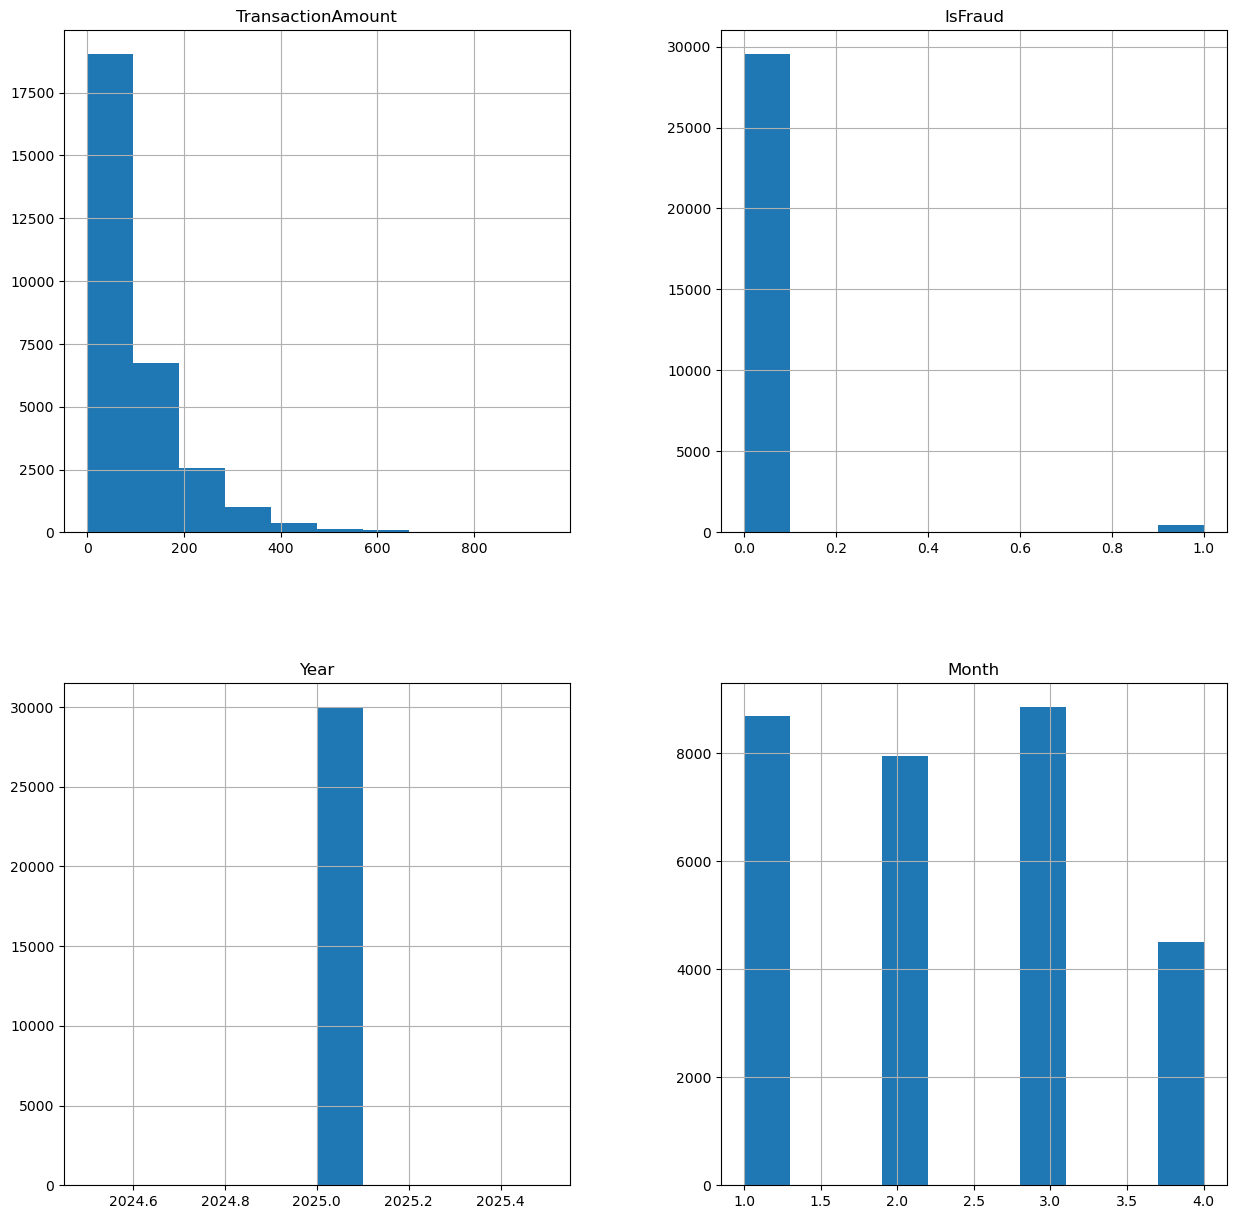

In [59]:
df.hist(figsize=(15, 15))
plt.show()

# Boxplot (Finding Outliers and Spread)
- Show the spread (minimum, maximum, median, quartiles).

- Show outliers (dots outside the box).
- 📍 Small box → Feature values are very close together (low variance).

- 📍 Big box → Feature values are spread out (high variance).

- 📍 Many dots outside → Feature has many outliers.

In [60]:
import seaborn as sns

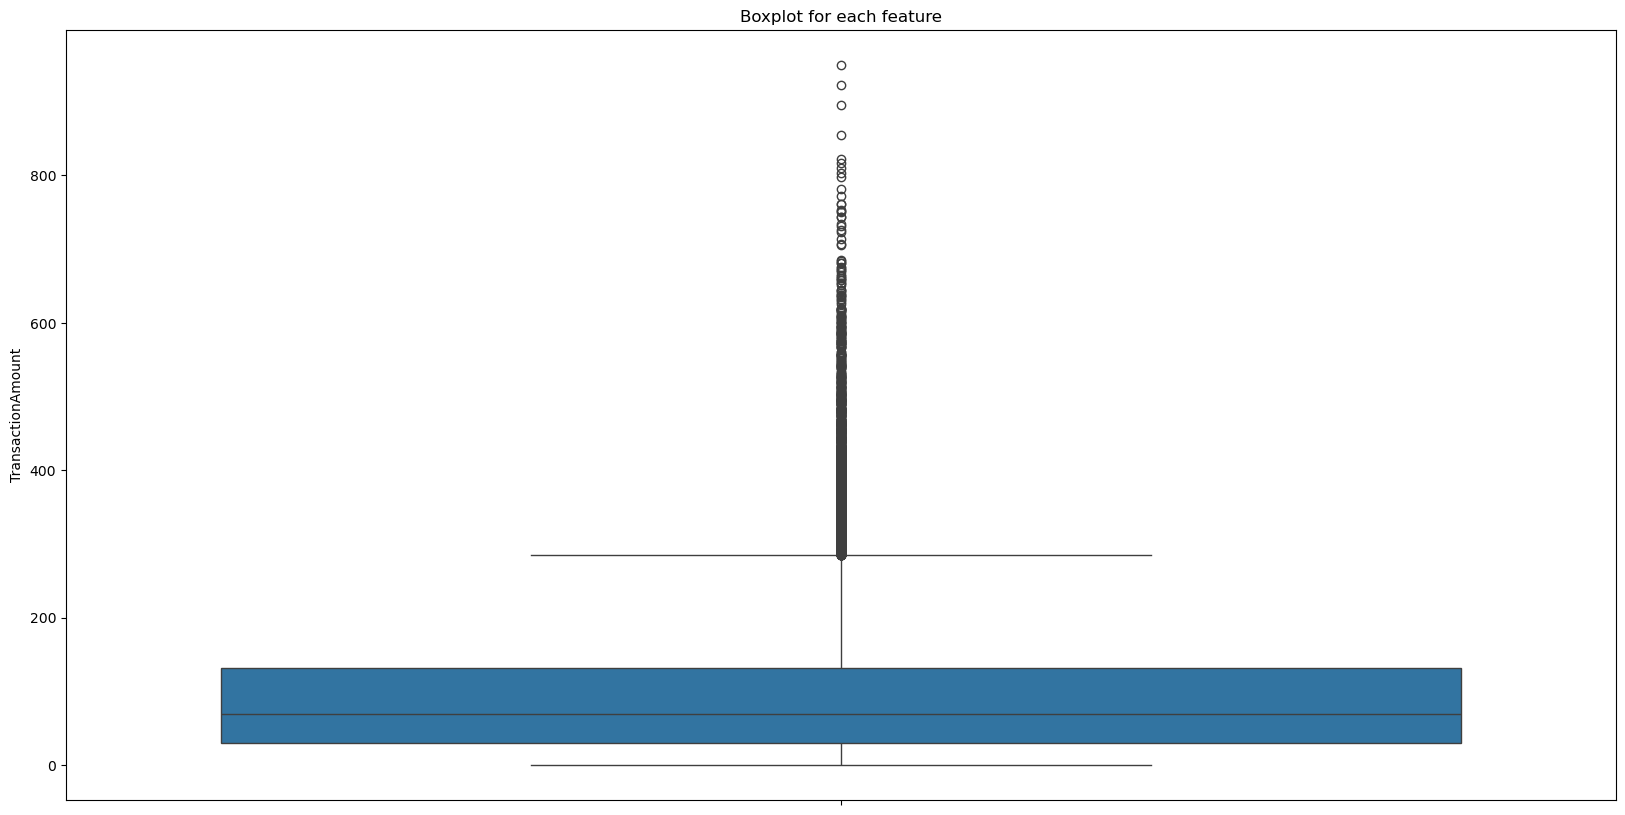

In [ ]:
# Boxplot for all TransactionAmount features
plt.figure(figsize=(20, 10))
sns.boxplot(data=df['TransactionAmount'])
plt.xticks(rotation=90)
plt.title('Boxplot for each feature')
plt.show()

#  Correlation Matrix (Heatmap)
- Calculate correlation between all features.

- Plot a colorful heatmap where:

- - +1 → Strong positive relationship

- - -1 → Strong negative relationship

- - 0 → No relationship

- Color	      ----->>       Meaning

- - Dark Red	   ----->>      Strong Positive (feature increases together)

- - Dark Blue	    ----->>     Strong Negative (one feature increases, other decreases)

- - White or Light	   ----->>  Weak/No relation

- 📍 Correlation near +1 → Features are similar (move together).

- 📍 Correlation near -1 → Features are opposite.

- 📍 Correlation near 0 → Features are independent.

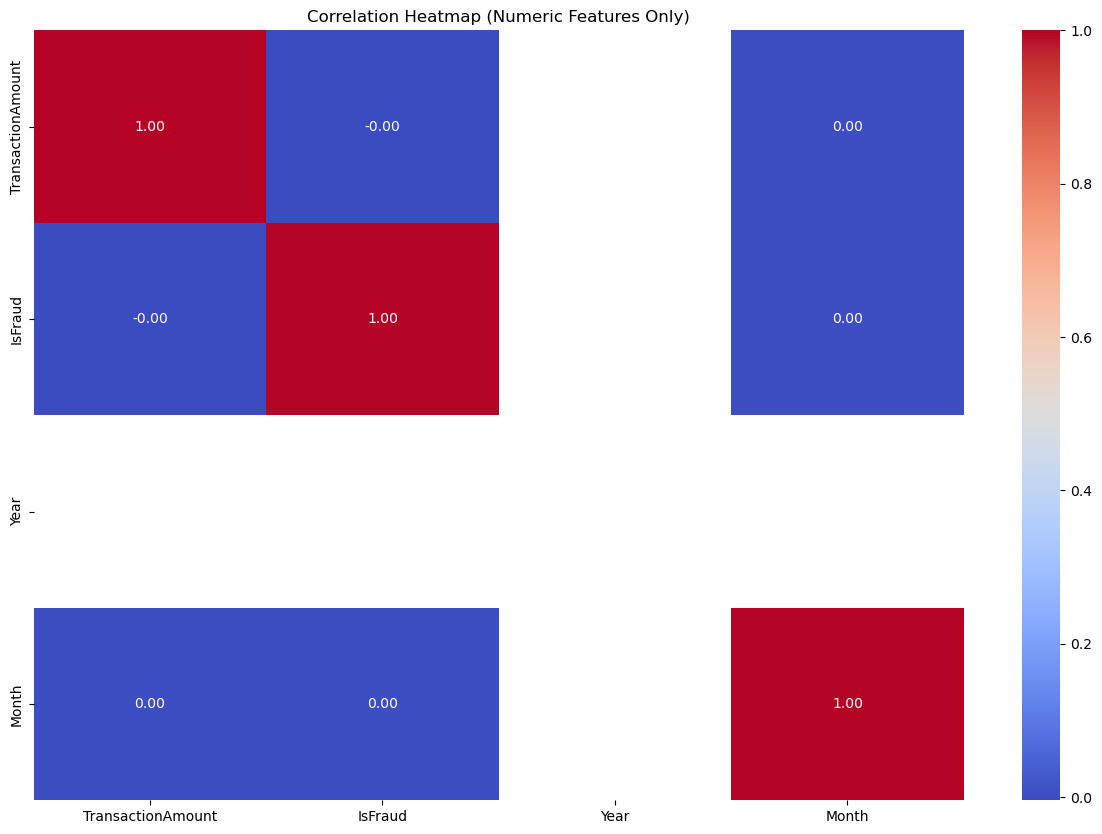

In [65]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

# Count Plot

- ✅ After seeing this, you will know:

- - Whether your dataset is imbalanced (most real-world fraud datasets are).

- - Whether you need techniques like oversampling/undersampling later during model training.

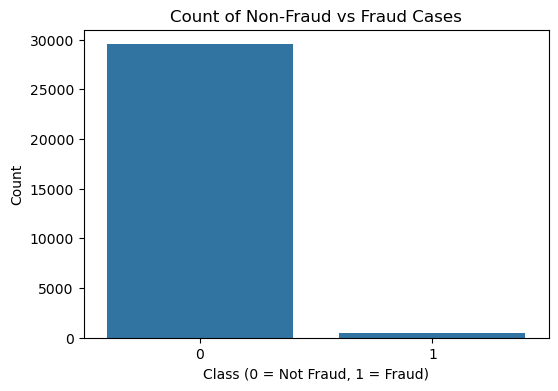

In [69]:

# Assuming 'Class' is the column where
# 0 = Not Fraud, 1 = Fraud
plt.figure(figsize=(6,4))
sns.countplot(x='IsFraud', data=df)
plt.title('Count of Non-Fraud vs Fraud Cases')
plt.xlabel('Class (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()


# Pairplot (Scatterplots between features)
- ✅ What this code does:

- Picks only a few important features (because pairplot becomes very heavy if we use full dataset).

- Plots scatterplots for each feature pair.

- Colors points based on 'Class' (0 = Non-fraud, 1 = Fraud).

- Observation ------>	Meaning
- - Fraud and non-fraud points are separated ------>	These features are good for model training
- - Fraud and non-fraud points mixed ------>	These features may not help much

- ✅ After pairplot, you will visually know:

- - Which features help in separating fraud cases.

- - Which ones are not so helpful.

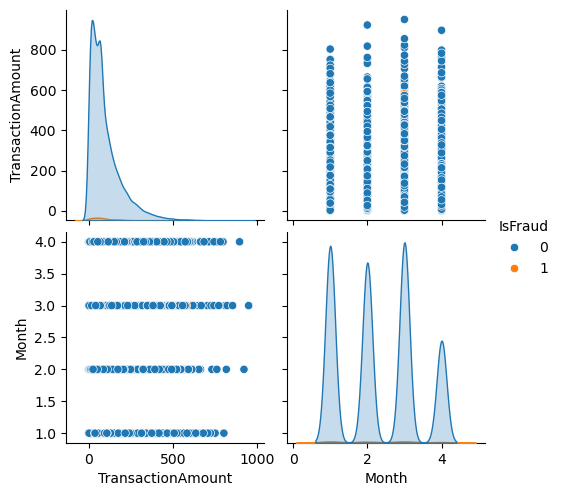

In [73]:
# Take only important columns for pairplot
# Example: V1, V2, V3, Amount and Class
selected_columns = ['TransactionAmount', 'Month','IsFraud']

# Make sure columns exist (skip this if you're sure)
selected_columns = [col for col in selected_columns if col in df.columns]

# Plot pairplot
sns.pairplot(df[selected_columns], hue='IsFraud', diag_kind='kde')
plt.show()
